### Mandelbrot-Set Processing 

Mandelbrot-Set Processing Time: 61.72375822067261


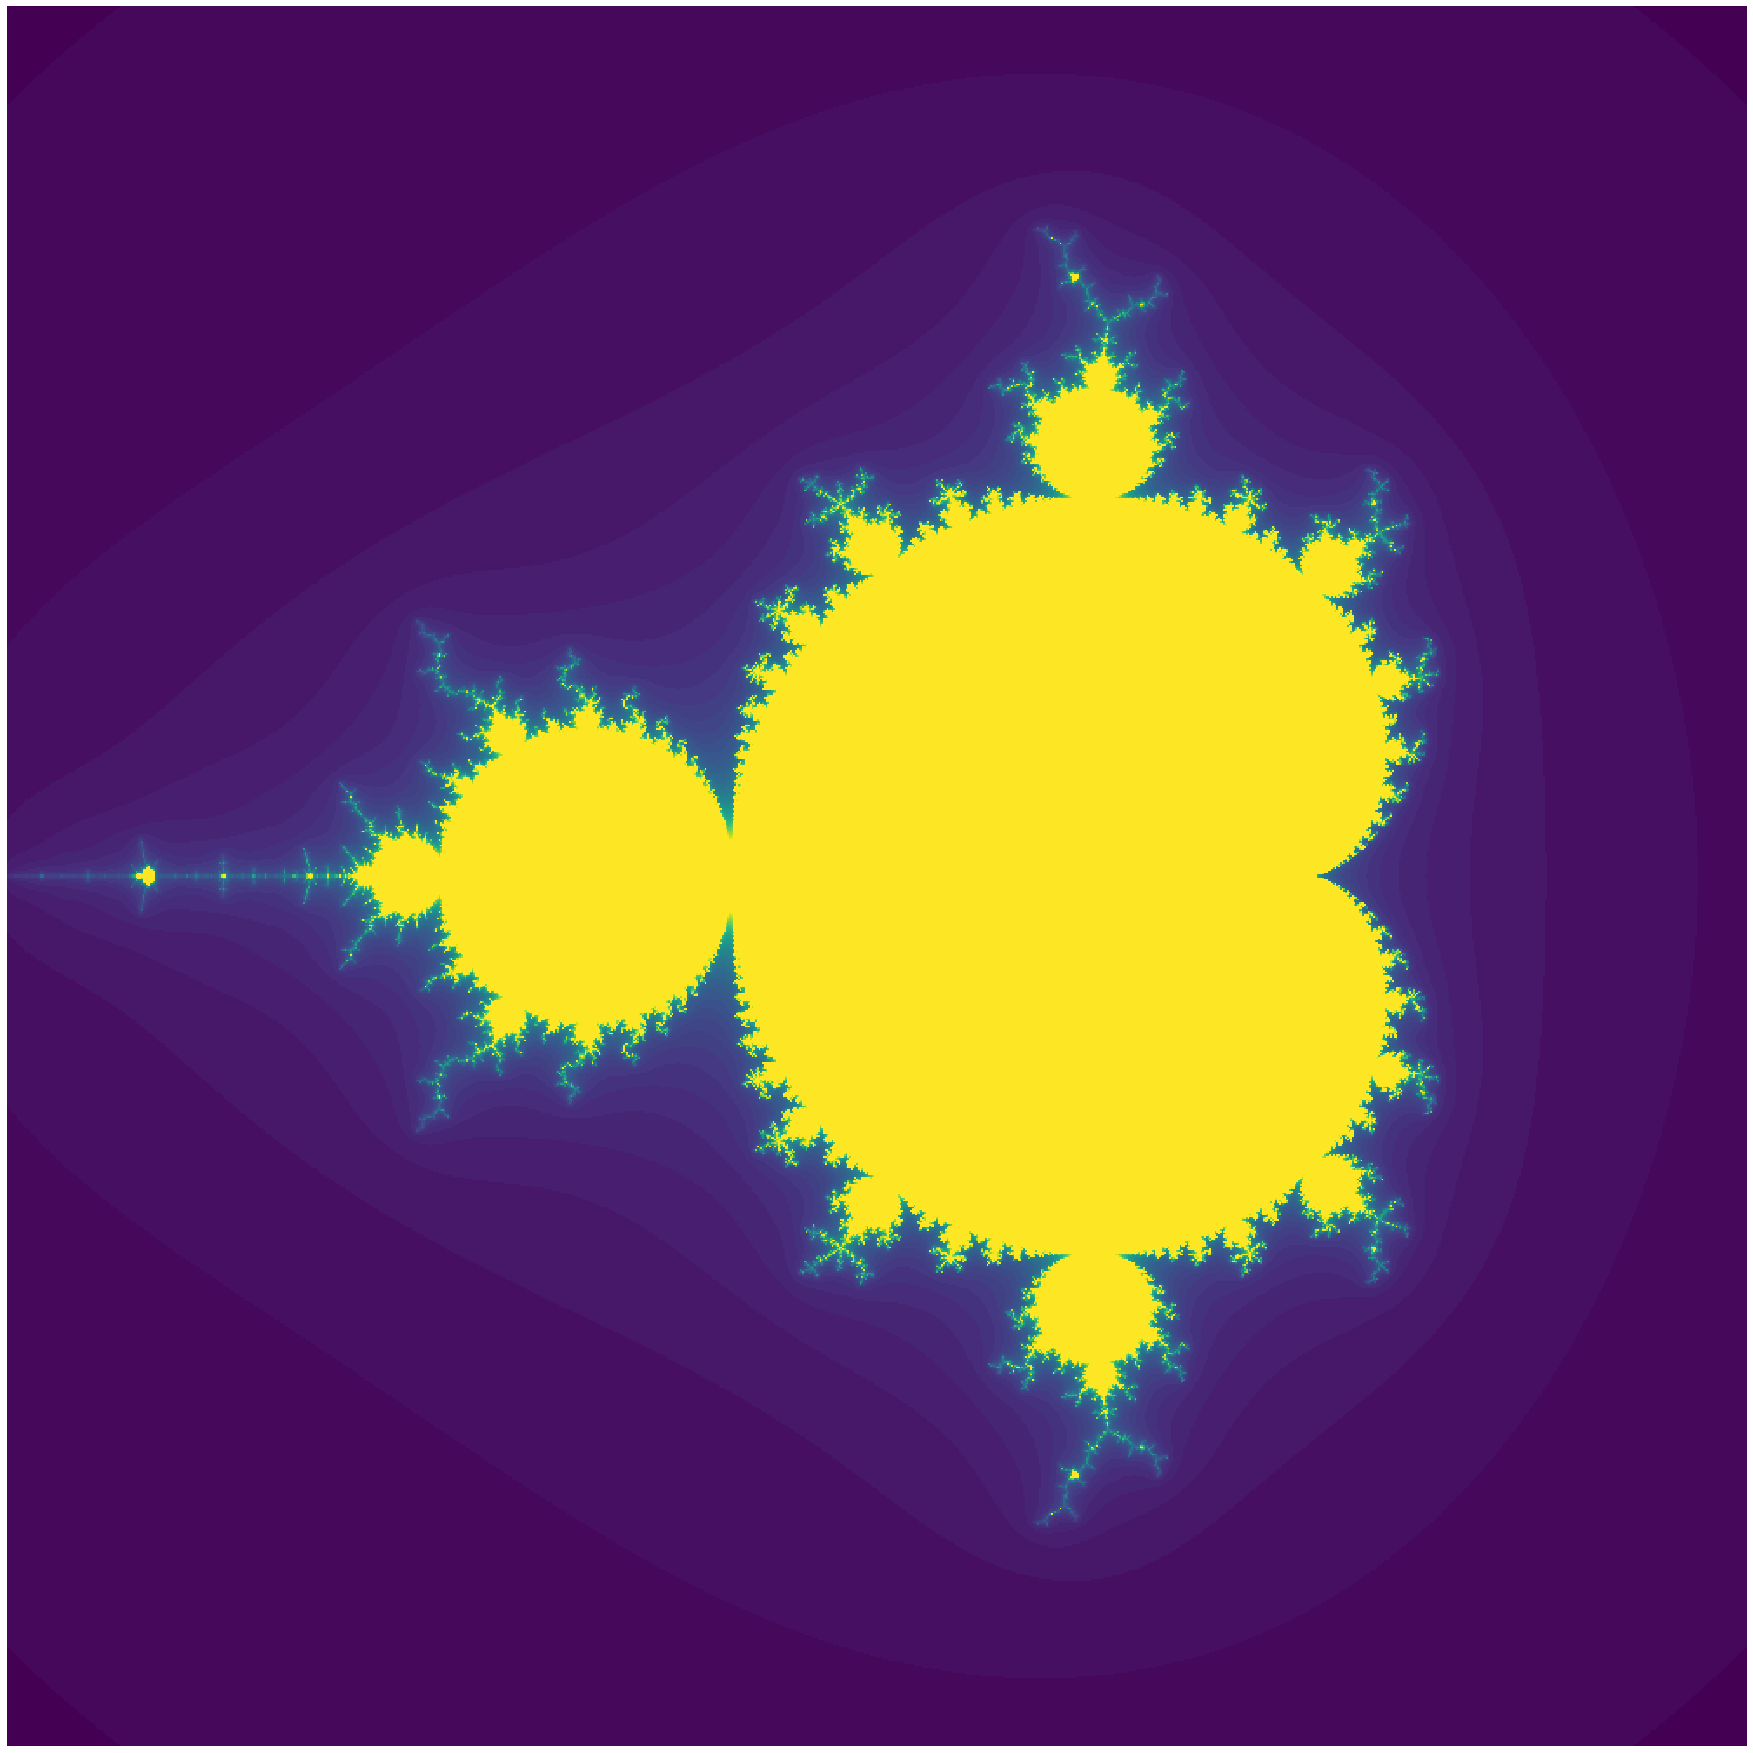

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import newaxis
import time
import os

plt.rcParams["figure.figsize"] = 32, 32

#Iteration Count
def Iteration_count(c, threshold):
    z = complex(0, 0)
    for iteration in range(threshold):
        z = z**2 + c
        if abs(z) > 4:
            break
    return iteration

#Plot
def mandelbrot_set(threshold, img_size = 1000):
    r_Axis = np.linspace(-2, 1, img_size)
    i_Axis = np.linspace(-1.5, 1.5, img_size)
    plot = np.empty((r_Axis.size, i_Axis.size))
    #Plot-Color
    for index_x, ix in enumerate(r_Axis):
        for index_y, iy in enumerate(i_Axis):
            plot[index_x, index_y] = Iteration_count(complex(ix, iy), threshold)
    return plot

#Safe-Image
def save_img(arr):
    plt.imshow(arr.T, interpolation="nearest")
    script_dir = os.path.dirname('')
    results_dir = os.path.join(script_dir, 'images/')
    sample_file_name = "sample"
    if not os.path.isdir(results_dir):
        os.makedirs(results_dir)
    plt.axis('off')
    plt.savefig(results_dir + "00001.png", dpi = 300, bbox_inches='tight', pad_inches = 0)
    
#Process+Timing
t0_mandelprocess = time.time()
out = mandelbrot_set(50, 1000)
plt.show()
save_img(out)
t1_mandelprocess = time.time()
print("Mandelbrot-Set Processing Time:", t1_mandelprocess - t0_mandelprocess)

### Video Processing using OpenCV 

In [3]:
import cv2
import numpy as np
import glob
import time 

t0_vidprocess = time.time()
img_array = []

for filename in glob.glob('data/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('Result.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 20, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()
t1_vidprocess = time.time()

print("Video Processing Time:", t1_vidprocess - t0_vidprocess)

Video Processing Time: 121.56834840774536


Video can be played with VLC media player. For some reason the standard Windows Video Programm does not support this generated video. 

### New way computing the Set as MP4

Frame 0 created
Frame 1 created
Frame 2 created
Frame 3 created
Frame 4 created
Frame 5 created
6
7
8
9
 Video Processing Time: 51.56946158409119
Creating..../data/frame0.jpg
Creating..../data/frame1.jpg
Creating..../data/frame2.jpg
Creating..../data/frame3.jpg
Creating..../data/frame4.jpg
Creating..../data/frame5.jpg
Creating..../data/frame6.jpg
Creating..../data/frame7.jpg
Creating..../data/frame8.jpg
Creating..../data/frame9.jpg
Frame sclicing Time: 1.477325439453125


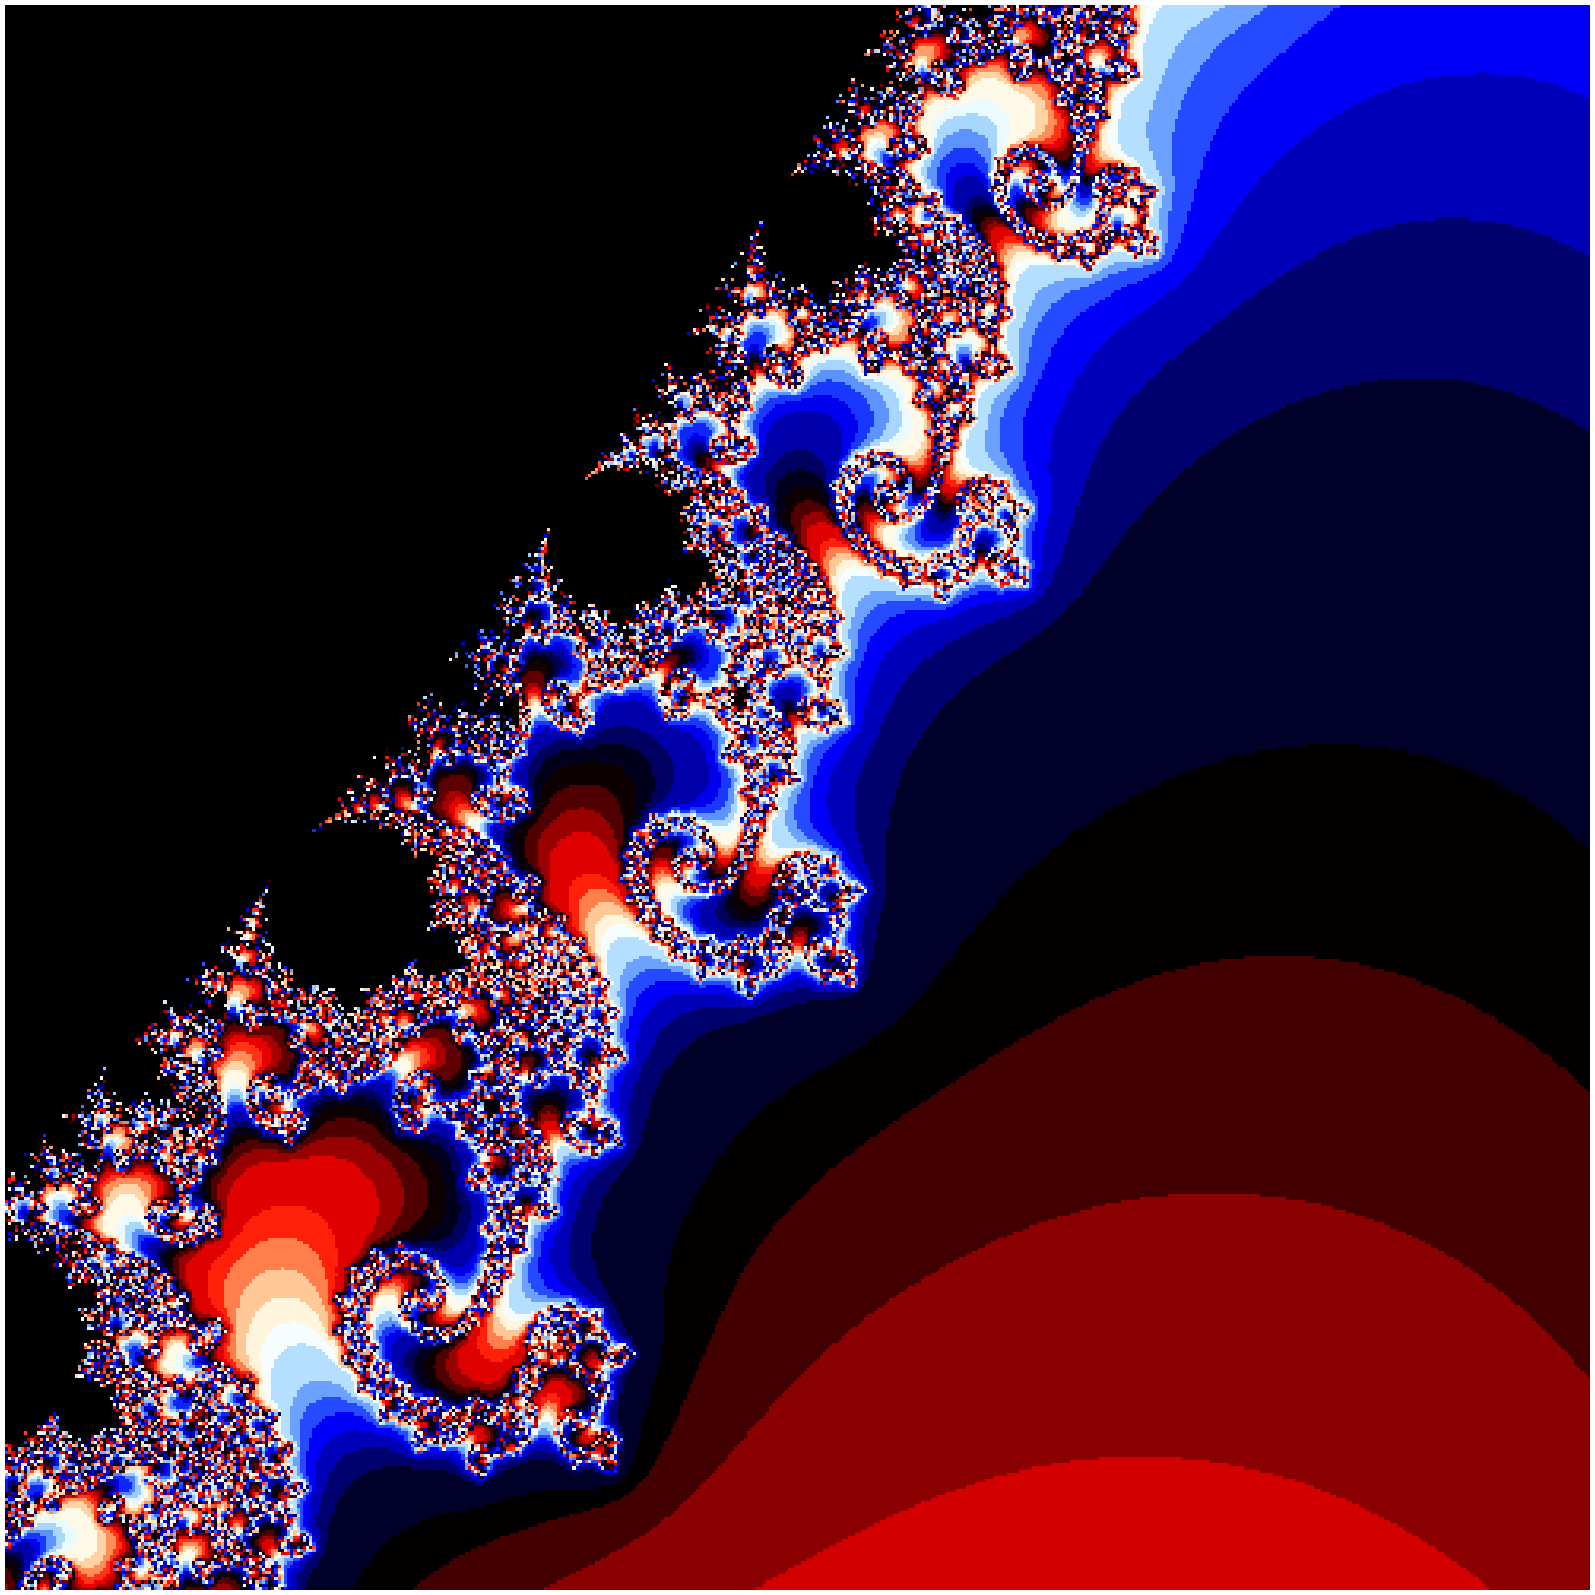

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from itertools import cycle
import matplotlib.colors as clr
import matplotlib.animation as animation
import moviepy.editor as mp
import time
import os
import cv2

colorpoints = [(1-(1-q)**4, c) for q, c in zip(np.linspace(0, 1, 20),
                                               cycle(['#ffff88', '#000000',
                                                      '#ffaa00',]))]
cmap = clr.LinearSegmentedColormap.from_list('mycmap',colorpoints, N=2048)
    
rc('animation', html='html5')

fig_size = 32

fig = plt.figure(figsize=(fig_size, fig_size), dpi = 50, tight_layout=True)
max_frames = 10
max_zoom = 1000
rmin, rmax, imin, imax = -2.5, 1.5, -2, 2

images = []
Writer = animation.writers['ffmpeg']
writer = Writer(fps=2, metadata=dict(artist='Me'), bitrate=1800)


def mandelbrot(rmin, rmax, rpoints, imin, imax, ipoints,
               max_iterations=300, infinity_border=10):
    image = np.zeros((rpoints, ipoints))
    r, i = np.mgrid[rmin:rmax:(rpoints * 1j), imin:imax:(ipoints * 1j)]
    c = r + 1j * i
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z ** 2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return -image.T


def init():
    return plt.gca()


def animate(i):
    if i > max_frames // 2: #probieren, ob man //2 weglassen kann um alle Werte richtig ausgedruckt zu bekommen
        plt.imshow(images[max_frames // 2 - i], cmap='flag')
        print(i)
        return

    r_center, i_center = -0.793191078177363, 0.16093721735804
    zoom = (i / max_frames * 2) ** 3 * max_zoom + 1
    scalefactor = 1 / zoom
    rmin_ = (rmin - r_center) * scalefactor + r_center
    imin_ = (imin - i_center) * scalefactor + i_center
    rmax_ = (rmax - r_center) * scalefactor + r_center
    imax_ = (imax - i_center) * scalefactor + i_center
    image = mandelbrot(rmin_, rmax_, 500, imin_, imax_, 500)
    plt.axis('off', bbox_inches='tight', pad_inches = 0, tight_layout=True)
    plt.imshow(image, cmap=cmap, interpolation='none')
    images.append(image)
    print("Frame {} created".format(i))
    return plt.gca()

def cut_frames():
    cam = cv2.VideoCapture("OUTPUT.mp4")
    try: 
       # creating a folder named data 
       if not os.path.exists('data'): 
            os.makedirs('data') 
     # if not created then raise error 
    except OSError: 
        print ('Error: Creating directory of data') 
    # frame 
    currentframe = 0
    while(True): 
        # reading from frame 
        ret,frame = cam.read() 
        if ret: 
            # if video is still left continue creating images 
            name = './data/frame' + str(currentframe) + '.jpg'
            print ('Creating...' + name) 
            # writing the extracted images 
            cv2.imwrite(name, frame) 
            # increasing counter so that it will 
            # show how many frames are created 
            currentframe += 1
        else: 
            break
    # Release all space and windows once done 
    cam.release() 
    cv2.destroyAllWindows() 
    
    
t0 = time.time()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=max_frames, interval=150)
anim.save('OUTPUT.mp4', writer=writer)
t1 = time.time()
print(" Video Processing Time:", t1 - t0)
t01 = time.time()
cut_frames()
t11 = time.time()
print("Frame sclicing Time:", t11 - t01)

### Better Version, improved quality etc.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from itertools import cycle
import matplotlib.colors as clr
import matplotlib.animation as animation
import moviepy.editor as mp
import time
import os
import cv2

colorpoints = [(1-(1-q)**4, c) for q, c in zip(np.linspace(0, 1, 20),
                                               cycle(['#ffff88', '#000000',    #Standard: #ffff88, #000000, #ffaa00
                                                      '#ffaa00',]))]   
#http://www.am.uni-duesseldorf.de/de/Links/Tools/farbtabelle.html for RGB-codes
cmap = clr.LinearSegmentedColormap.from_list('mycmap',colorpoints, N=2048)
    
rc('animation', html='html5')

fig_size = 8

fig = plt.figure(figsize=(fig_size, fig_size), dpi = 100, tight_layout=True)
max_frames = 500
max_zoom = 50000 #max_zoom for these coordinates (0.357535415497125, 0.070571561552046) 1.7592187E13
                 #can go higher but it is possible that it zooms into a non borderregion region
                 #but 1.7592187E13 is already a huge zoom-factor 
rmin, rmax, imin, imax = -2.5, 1.5, -2, 2

images = []
Writer = animation.writers['ffmpeg']
writer = animation.FFMpegWriter(fps=10, metadata=dict(artist='Lukas Kretschamnn'), bitrate = -1)


def mandelbrot(rmin, rmax, rpoints, imin, imax, ipoints,
               max_iterations=1000, infinity_border=10):
    image = np.zeros((rpoints, ipoints))
    r, i = np.mgrid[rmin:rmax:(rpoints * 1j), imin:imax:(ipoints * 1j)]
    c = r + 1j * i
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z ** 2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return -image.T


def init():
    return plt.gca()


def animate(i):
    if i > max_frames: #probieren, ob man //2 weglassen kann um alle Werte richtig ausgedruckt zu bekommen
        plt.imshow(images[max_frames - i], cmap='flag')
        print(i)
        return

    r_center, i_center = 0.357535415497125, 0.070571561552046 #Standard:  0.357535415497125, 0.070571561552046
    zoom = (i / max_frames) ** 3 * max_zoom + 1
    scalefactor = 1 / zoom
    rmin_ = (rmin - r_center) * scalefactor + r_center
    imin_ = (imin - i_center) * scalefactor + i_center
    rmax_ = (rmax - r_center) * scalefactor + r_center
    imax_ = (imax - i_center) * scalefactor + i_center
    image = mandelbrot(rmin_, rmax_, 1000, imin_, imax_, 1000) #increase rpoints and ipoints for better resolution
    plt.axis('off', bbox_inches='tight', pad_inches = 0, tight_layout=True)
    plt.imshow(image, cmap=cmap, interpolation='none')
    images.append(image)
    print("Frame number {} created;".format(i), "next frame: {}".format(i + 1)) #counter starts with zero; so last frame number is max_frames - 1
    return plt.gca()

def cut_frames():
    cam = cv2.VideoCapture("OUTPUT.mp4")
    try: 
       # create a directory named data 
       if not os.path.exists('data'): 
            os.makedirs('data') 
     # if directory was not created then raise an error 
    except OSError: 
        print ('Error: Creating directory of data failed') 
    # frame 
    currentframe = 0
    while(True): 
        # reading from frame 
        ret,frame = cam.read() 
        if ret: 
            # if video is still left continue creating images 
            name = './data/frame' + str(currentframe) + '.jpg'
            print ('Creating...' + name) 
            # writing the extracted images 
            cv2.imwrite(name, frame) 
            # increasing counter so that it will 
            # show how many frames are created 
            currentframe += 1
        else: 
            break
    # Release all space and windows once done 
    cam.release() 
    cv2.destroyAllWindows() 
    
    
t0 = time.time()
print("Video Processing")
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=max_frames, interval=150)
anim.save('OUTPUT.mp4', writer=writer, dpi = 100)
t1 = time.time()
print(" Video Processing Time:", t1 - t0)
t01 = time.time()
print("Next Step: Frame slicing")
cut_frames()
t11 = time.time()
print("Frame sclicing Time:", t11 - t01)

Video Processing
Frame number 0 created; next frame: 1
Frame number 1 created; next frame: 2
Frame number 2 created; next frame: 3
Frame number 3 created; next frame: 4
Frame number 4 created; next frame: 5
Frame number 5 created; next frame: 6
Frame number 6 created; next frame: 7
Frame number 7 created; next frame: 8
Frame number 8 created; next frame: 9
Frame number 9 created; next frame: 10
Frame number 10 created; next frame: 11
Frame number 11 created; next frame: 12
Frame number 12 created; next frame: 13
Frame number 13 created; next frame: 14
Frame number 14 created; next frame: 15
Frame number 15 created; next frame: 16
Frame number 16 created; next frame: 17
Frame number 17 created; next frame: 18
Frame number 18 created; next frame: 19
Frame number 19 created; next frame: 20
Frame number 20 created; next frame: 21
Frame number 21 created; next frame: 22
Frame number 22 created; next frame: 23
Frame number 23 created; next frame: 24
Frame number 24 created; next frame: 25
Fr

Frame number 200 created; next frame: 201
Frame number 201 created; next frame: 202
Frame number 202 created; next frame: 203
Frame number 203 created; next frame: 204
Frame number 204 created; next frame: 205
Frame number 205 created; next frame: 206
Frame number 206 created; next frame: 207
Frame number 207 created; next frame: 208
Frame number 208 created; next frame: 209
Frame number 209 created; next frame: 210
Frame number 210 created; next frame: 211
Frame number 211 created; next frame: 212
Frame number 212 created; next frame: 213
Frame number 213 created; next frame: 214
Frame number 214 created; next frame: 215
Frame number 215 created; next frame: 216
Frame number 216 created; next frame: 217
Frame number 217 created; next frame: 218
Frame number 218 created; next frame: 219
Frame number 219 created; next frame: 220
Frame number 220 created; next frame: 221
Frame number 221 created; next frame: 222
Frame number 222 created; next frame: 223
Frame number 223 created; next fra

KeyboardInterrupt: 

### Even better version, improved memory usage and quality

Video Processing


KeyboardInterrupt: 

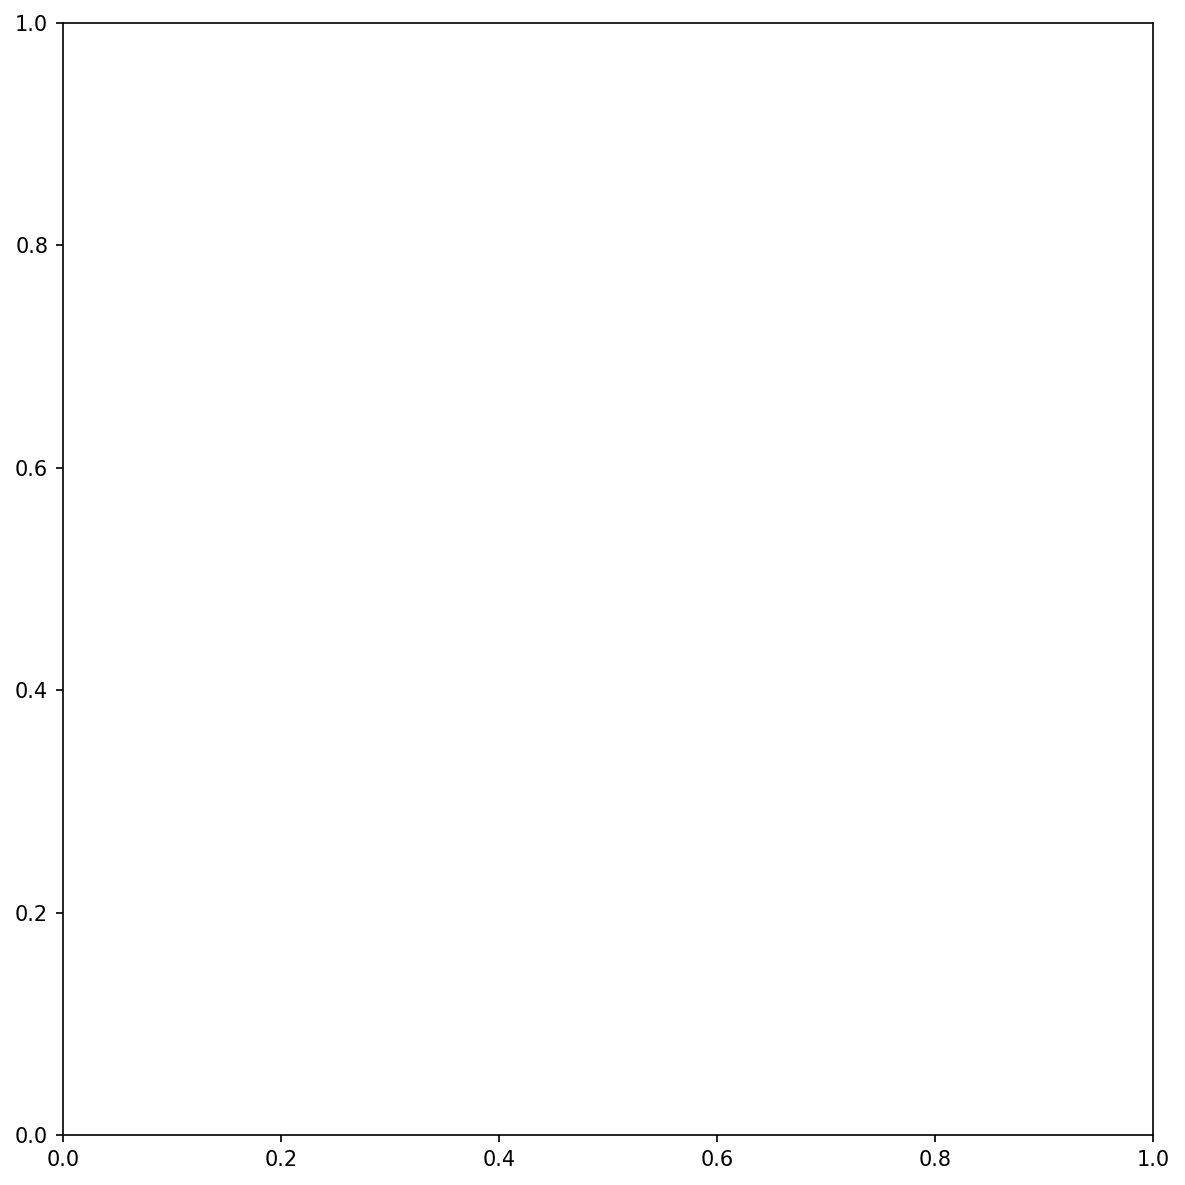

In [2]:
import matplotlib.animation as manimation
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from itertools import cycle
import matplotlib.colors as clr
import matplotlib.animation as animation
import moviepy.editor as mp
import os
import cv2
import time

colorpoints = [(1-(1-q)**4, c) for q, c in zip(np.linspace(0, 1, 20),
                                               cycle(['#ffff88', '#000000',    #Standard: #ffff88, #000000, #ffaa00
                                                      '#ffaa00',]))]   
#http://www.am.uni-duesseldorf.de/de/Links/Tools/farbtabelle.html for RGB-codes
cmap = clr.LinearSegmentedColormap.from_list('mycmap',colorpoints, N=2048)
    
rc('animation', html='html5')

fig_size = 8

fig = plt.figure(figsize=(fig_size, fig_size), dpi = 150, tight_layout=True)
max_frames = 2
max_zoom = 100000 #max_zoom for these coordinates (0.357535415497125, 0.070571561552046) 1.7592187E13
                 #can go higher but it is possible that it zooms into a non borderregion region
                 #but 1.7592187E13 is already a huge zoom-factor 
rmin, rmax, imin, imax = -2.5, 1.5, -2, 2

Writer = animation.writers['ffmpeg']
writer = animation.FFMpegWriter(fps=2, metadata=dict(artist='Lukas Kretschamnn'), bitrate = -1, extra_args=['-pix_fmt', 'yuv420p'] )


def mandelbrot(rmin, rmax, rpoints, imin, imax, ipoints, max_iterations=1000, infinity_border=10):
    image = np.zeros((rpoints, ipoints))
    r, i = np.mgrid[rmin:rmax:(rpoints * 1j), imin:imax:(ipoints * 1j)]
    c = r + 1j * i
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z ** 2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return -image.T


def init():
    return plt.gca()


def animate(i):
    r_center, i_center = 0.340037926617566, -0.051446751669 #Standard:  0.357535415497125, 0.070571561552046
    zoom = (i / max_frames) ** 3 * max_zoom + 1
    scalefactor = 1 / zoom
    rmin_ = (rmin - r_center) * scalefactor + r_center 
    imin_ = (imin - i_center) * scalefactor + i_center
    rmax_ = (rmax - r_center) * scalefactor + r_center
    imax_ = (imax - i_center) * scalefactor + i_center
    image = mandelbrot(rmin_, rmax_, 1000, imin_, imax_, 1000) #increase rpoints and ipoints for better resolution
    plt.axis('off', bbox_inches='tight', pad_inches = 0, tight_layout=True)
    plt.imshow(image, cmap=cmap, interpolation='none')
    print("Frame number {} created;".format(i), "next frame: {}".format(i + 1), "|", ((i + 1)/max_frames) * 100, "%") #counter starts with zero; so last frame number is max_frames - 1

def cut_frames():
    cam = cv2.VideoCapture("OUTPUT.mp4")
    try: 
       # create a directory named data 
       if not os.path.exists('data'): 
            os.makedirs('data') 
     # if directory was not created then raise an error 
    except OSError: 
        print ('Error: Creating directory of data failed') 
    # frame 
    currentframe = 0
    while(True): 
        # reading from frame 
        ret,frame = cam.read() 
        if ret: 
            # if video is still left continue creating images 
            name = './data/frame' + str(currentframe) + '.jpg'
            print ('Creating...' + name) 
            # writing the extracted images 
            cv2.imwrite(name, frame) 
            # increasing counter so that it will 
            # show how many frames are created 
            currentframe += 1
        else: 
            break
    # Release all space and windows once done 
    cam.release() 
    cv2.destroyAllWindows() 
 
print("Video Processing")
t0a = time.time()
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=max_frames, interval=150)
anim.save('OUTPUT.mp4', writer=writer, dpi = 150)
t1a = time.time()
print("Took:", t1a - t0a, "Next Step: Frame slicing")
t0b = time.time()
cut_frames()
t1b = time.time()
print("Took:", t1b - t0b, " FINISHED")

Video Processing


C:\Users\Lukas\Anaconda3\lib\site-packages\ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in greater


Frame number 0 created; next frame: 1 | 50.00%
Frame number 1 created; next frame: 2 | 100.00%
Took: 139.39100000000326 Next Step: Frame slicing
Creating... ./data/frame0.jpg
Creating... ./data/frame1.jpg
Took: 0.5629999999946449  FINISHED


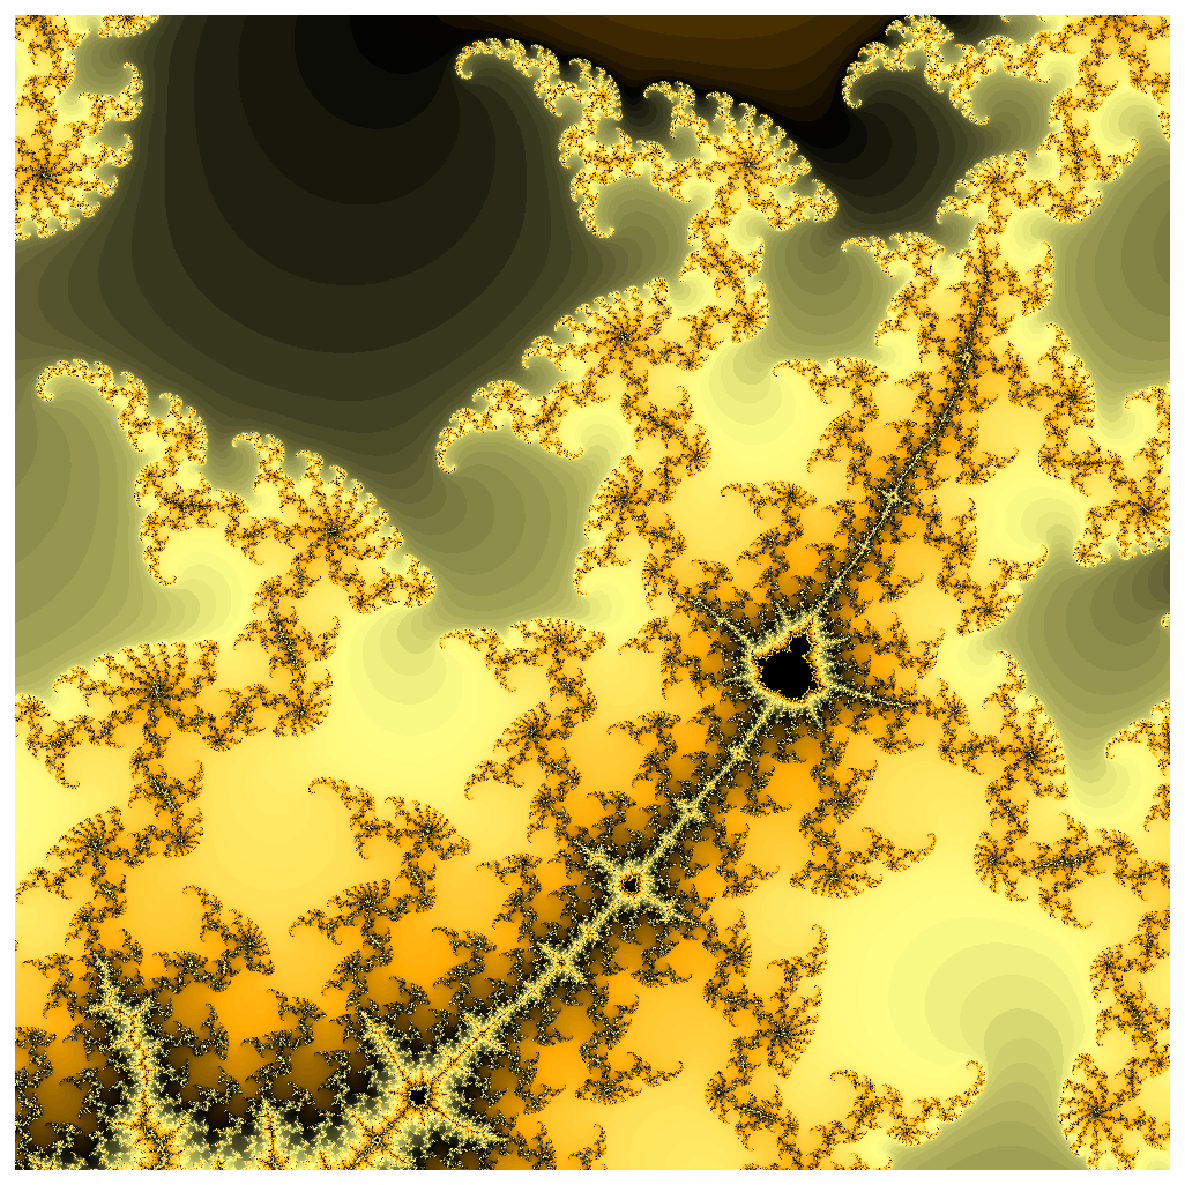

In [1]:
import os
import time
from itertools import count, cycle
from pathlib import Path

import cv2
import matplotlib
from matplotlib import rc, animation
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FFMpegWriter, FuncAnimation


COLOR_MAP = clr.LinearSegmentedColormap.from_list(
    "mycmap",
    [
        (1 - (1 - q) ** 4, c)
        for q, c in zip(
            np.linspace(0, 1, 20), cycle(["#ffff88", "#000000", "#ffaa00"])
        )
    ],
    N=2048,
)

MAX_FRAMES = 2
#
# MAX_ZOOM for these coordinates (0.357535415497125, 0.070571561552046)
# 1.7592187E13 can go higher but it is possible that it zooms into a non
# borderregion region but 1.7592187E13 is already a huge zoom-factor
#
MAX_ZOOM = 100000
RMIN, RMAX, IMIN, IMAX = -2.5, 1.5, -2, 2
OUTPUT_FILENAME = "OUTPUT.mp4"
IMAGES_PATH = Path("data")

def mandelbrot(
    rmin,
    rmax,
    rpoints,
    imin,
    imax,
    ipoints,
    max_iterations=1000,
    infinity_border=10
):
    image = np.zeros((rpoints, ipoints))
    r, i = np.mgrid[rmin:rmax:(rpoints * 1j), imin:imax:(ipoints * 1j)]
    c = r + 1j * i
    z = np.zeros_like(c)
    for k in range(max_iterations):
        z = z ** 2 + c
        mask = (np.abs(z) > infinity_border) & (image == 0)
        image[mask] = k
        z[mask] = np.nan
    return -image.T


def init():
    return plt.gca()


def animate(frame_number):
    #
    # Standard:  0.357535415497125, 0.070571561552046
    #
    r_center, i_center = 0.340037926617566, -0.051446751669 
    zoom = (frame_number / MAX_FRAMES) ** 3 * MAX_ZOOM + 1
    scalefactor = 1 / zoom
    rmin_ = (RMIN - r_center) * scalefactor + r_center 
    imin_ = (IMIN - i_center) * scalefactor + i_center
    rmax_ = (RMAX - r_center) * scalefactor + r_center
    imax_ = (IMAX - i_center) * scalefactor + i_center
    #
    # Increase rpoints and ipoints for better resolution.
    #
    image = mandelbrot(rmin_, rmax_, 1000, imin_, imax_, 1000)
    plt.axis('off', bbox_inches='tight', pad_inches = 0, tight_layout=True)
    plt.imshow(image, cmap=COLOR_MAP, interpolation='none')
    #
    # Counter starts with zero; so last frame number is MAX_FRAMES - 1.
    #
    print(
        "Frame number {} created; next frame: {} | {:.2%}".format(
            frame_number, frame_number + 1, (frame_number + 1) / MAX_FRAMES
        )
    )
    
    
def cut_frames(video_filename, target_path):
    video = cv2.VideoCapture(video_filename)
    try:
        #
        # create a directory named data
        #
        try:
            target_path.mkdir(exist_ok=True)
            #
            # if directory was not created then raise an error
            #
        except OSError:
            print("Error: Creating directory for data failed")
        else:
            #
            # frame
            #
            currentframe = 0
            for frame_number in count():
                is_ok, frame = video.read()
                if not is_ok:
                    break
                #
                # if video is still left continue creating images
                #
                image_filename = './data/frame' + str(currentframe) + '.jpg'
                print("Creating...", image_filename)
                #
                # writing the extracted images 
                #
                cv2.imwrite(image_filename, frame)
                #
                # increasing counter so that it will 
                # show how many frames are created
                #
                currentframe +=1
    finally:
        video.release()
        cv2.destroyAllWindows() 

        
def main():
    rc('animation', html='html5')
    fig_size = 8
    fig = plt.figure(
        figsize=(fig_size, fig_size), 
        dpi = 150,
        tight_layout=True
    )
    Writer = animation.writers['ffmpeg']
    writer = animation.FFMpegWriter(
        fps=2,
        metadata=dict(artist='Lukas Kretschmann'),
        bitrate = -1, 
        extra_args=['-pix_fmt', 'yuv420p'] 
    )
    print("Video Processing")
    start_time = time.monotonic()
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=MAX_FRAMES, interval=150)
    anim.save('OUTPUT.mp4', writer=writer, dpi = 150)
    end_time = time.monotonic()
    print("Took:", end_time - start_time, "Next Step: Frame slicing")
    start_time = time.monotonic()
    cut_frames(OUTPUT_FILENAME, IMAGES_PATH)
    end_time = time.monotonic()
    print("Took:", end_time - start_time, " FINISHED")
    
    
if __name__ == "__main__":
    main()